# cluster analysis - Iris flowers 

In [2]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math

In [3]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


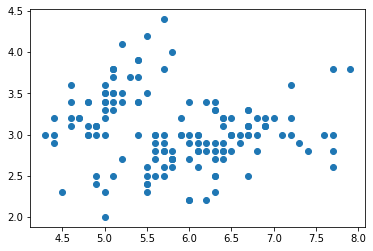

In [6]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.show()

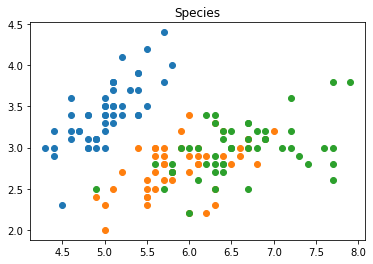

In [13]:
plt.scatter(iris.loc[iris['species'] == 'setosa']['sepal_length'], iris.loc[iris['species'] == 'setosa']['sepal_width'])
plt.scatter(iris.loc[iris['species'] == 'versicolor']['sepal_length'], iris.loc[iris['species'] == 'versicolor']['sepal_width'])
plt.scatter(iris.loc[iris['species'] == 'virginica']['sepal_length'], iris.loc[iris['species'] == 'virginica']['sepal_width'])
plt.title('Species')
plt.show()

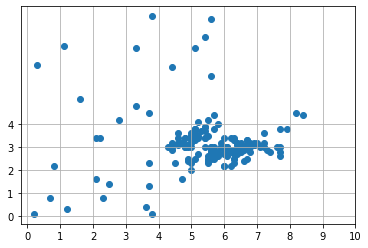

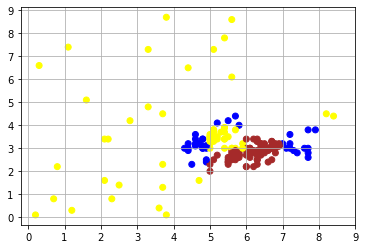

In [15]:
# iris['sepal_length'], iris['sepal_width']
sepal_length_max = iris['sepal_length'].max()
sepal_width_max = iris['sepal_width'].max()

grid = 0 
if sepal_length_max >= sepal_width_max:
    grid = math.ceil(sepal_length_max) + 1
else:
    grid = math.ceil(sepal_width_max) + 1

points_number = 30

x = list(iris['sepal_length'])
y = list(iris['sepal_width'])

x = [i + 0.0001 for i in x]
y = [i + 0.0001 for i in y]

# generate points
for n in range(points_number):
    x.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )
    y.append( (random.randrange(0, grid)) + (random.randrange(1, 9)/10) )

plt.scatter(x, y)
plt.xticks(list(range(grid + 2)))
plt.yticks(list(range(5)))
plt.grid()
plt.show()

# points coordinates
points = list(zip(x,y))
points = [list(x) for x in points]

# mapping cells
cells = list()
for x in range(1, grid + 2):
    row = list()
    for y in range(1, grid + 2):
        row.append([y,x, 0])
    cells.append(row)
    
# counting points in cells
for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    cells[y][x][2] += 1
    
# genereting classes based on number of points in cells     
occurrences = set()
for r in cells:
    for c in r:
        occurrences.add(c[2])
        
occurrences = list(occurrences)
classes = np.array_split(occurrences, 3)
classes = [ list(c) for c in classes]

points_class = {0: 'yellow', 1: 'blue', 2: 'brown'}

# assigning points to classes
def color_class(n):
    for i in range(len(classes)):
        if n in classes[i]:
            return points_class[i]

for p in points:
    x = math.ceil(p[0]) - 1
    y = math.ceil(p[1]) - 1
    color = color_class(cells[y][x][2])
    if len(p) < 3:
        p.append(color)
    else:
        p[2] = color
        
# plotting the results
plt.scatter([p[0] for p in points], [p[1] for p in points], c=[p[2] for p in points])
plt.xticks(list(range(0, grid +  1)))
plt.yticks(list(range(0, grid +  1)))
plt.grid()
plt.show()

In [16]:
for r in cells:
    print(r)

[[1, 1, 2], [2, 1, 1], [3, 1, 1], [4, 1, 2], [5, 1, 0], [6, 1, 0], [7, 1, 0], [8, 1, 0], [9, 1, 0], [10, 1, 0]]
[[1, 2, 0], [2, 2, 0], [3, 2, 2], [4, 2, 1], [5, 2, 1], [6, 2, 0], [7, 2, 0], [8, 2, 0], [9, 2, 0], [10, 2, 0]]
[[1, 3, 1], [2, 3, 0], [3, 3, 0], [4, 3, 1], [5, 3, 4], [6, 3, 24], [7, 3, 26], [8, 3, 4], [9, 3, 0], [10, 3, 0]]
[[1, 4, 0], [2, 4, 0], [3, 4, 2], [4, 4, 0], [5, 4, 18], [6, 4, 33], [7, 4, 29], [8, 4, 9], [9, 4, 0], [10, 4, 0]]
[[1, 5, 0], [2, 5, 0], [3, 5, 1], [4, 5, 2], [5, 5, 0], [6, 5, 4], [7, 5, 0], [8, 5, 0], [9, 5, 2], [10, 5, 0]]
[[1, 6, 0], [2, 6, 1], [3, 6, 0], [4, 6, 0], [5, 6, 0], [6, 6, 0], [7, 6, 0], [8, 6, 0], [9, 6, 0], [10, 6, 0]]
[[1, 7, 1], [2, 7, 0], [3, 7, 0], [4, 7, 0], [5, 7, 1], [6, 7, 1], [7, 7, 0], [8, 7, 0], [9, 7, 0], [10, 7, 0]]
[[1, 8, 0], [2, 8, 1], [3, 8, 0], [4, 8, 1], [5, 8, 0], [6, 8, 2], [7, 8, 0], [8, 8, 0], [9, 8, 0], [10, 8, 0]]
[[1, 9, 0], [2, 9, 0], [3, 9, 0], [4, 9, 1], [5, 9, 0], [6, 9, 1], [7, 9, 0], [8, 9, 0], [9, 9, 0],

In [17]:
classes

[[0, 1, 2, 33], [4, 9, 18], [24, 26, 29]]